## Лабораторная работа №6
#### *Прудникова Анастасия М8О-408Б-20*
*Вариант 24*


Целью работы является исследование свойств слоя Кохонена, карты Кохонена, а также сетей векторного квантования, обучаемых с учителем, алгоритмов обучения, а также применение сетей в задачах кластеризации и классификации.
Основные этапы работы:
1. Использовать слой Кохонена для выполнения кластеризации множества точек. Проверитькачество разбиения.
2. Использовать карту Кохонена для выполнения кластеризации множества точек.
3. Использовать карту Кохонена для нахождения одного из решений задачи коммивояжера.
4. Использовать сеть векторного квантования, обучаемую с учителем, (LVQ-сеть) для классификации точек в случае, когда классы не являются линейно разделимыми.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import tqdm

In [2]:
# Ввод
data = [
    [0, 0.8],
    [-1.2, 0.3],
    [-0.5, -0.5],
    [0.2, 1],
    [-1, 0.5],
    [1.2, -1],
    [-0.7, -0.1],
    [1.1, 0],
    [-0.7, 0.1],
    [0.2, -0.3],
    [-1.5, 0.6],
    [0, -0.4]
]

In [3]:
# класс сети Кохонена для кластеризации
class Kohonen:
    def __init__(self, features, width, height):
        self._features = features
        self._width = width
        self._height = height
        self._weights = np.random.randn(width * height, features)
        self._distances = np.zeros((width * height, width * height))

        kohonen_map = np.array([[x, y] for y in range(height) for x in range(width)])
        for i, p in enumerate(kohonen_map):
            self._distances[i] = np.linalg.norm(kohonen_map - p, axis=1)        

    def train(self, data, epoch=50):
        start_ef_width = max(self._width, self._height) / 2
        ef_width_rate = epoch / np.log(start_ef_width)
        shuffle_data = copy.copy(data)

        for i in tqdm.tqdm(range(epoch)):
            np.random.shuffle(shuffle_data)
            ef_width = start_ef_width * np.exp(-i / ef_width_rate)
            lr = np.exp(-i / epoch)

            for x in shuffle_data:
                x_distances = np.linalg.norm(self._weights - x, axis=1)
                win_point = np.argmin(x_distances)

                for i, d in enumerate(self._distances[win_point]):
                    tn = np.exp(-d**2 / (2 * ef_width**2))
                    self._weights[i] += (x - self._weights[i]) * lr * tn

    @property
    def reshape_weights(self):
        return np.array(self._weights.reshape((self._height,self._width, self._features)))

    @property
    def scale_weights(self):
        return ((self._weights - np.min(self._weights, axis=0)) / (np.max(self._weights, axis=0) - np.min(self._weights, axis=0))).reshape(
            (self._height, self._width, self._features))

In [4]:
model = Kohonen(2, 50, 50)

model.train(data)

100%|██████████| 50/50 [00:17<00:00,  2.80it/s]


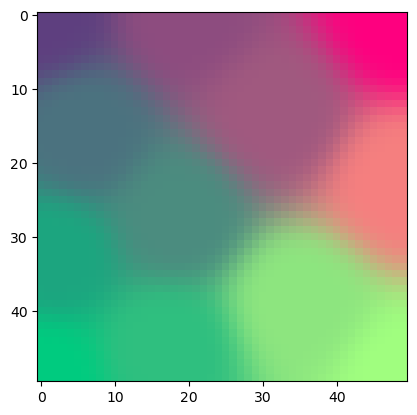

In [5]:
plt.imshow(np.insert(model.scale_weights, 2, 0.5, axis = 2))

В ходе выполнения лабораторной работы были изучены свойства слоя Кохонена, карты Кохонена и сетей векторного квантования, обучаемых с учителем. Также было проведено исследование алгоритмов обучения и применение данных сетей в задачах кластеризации и классификации.